# Reconstruction quality as a function of n_nodes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from echo import esn

### Experiment 1

If testing on the same signal on which were trained, how does the training signal length affect prediction quality?

Reservoir of 100 nodes, `ws` type.
..................................................................................................

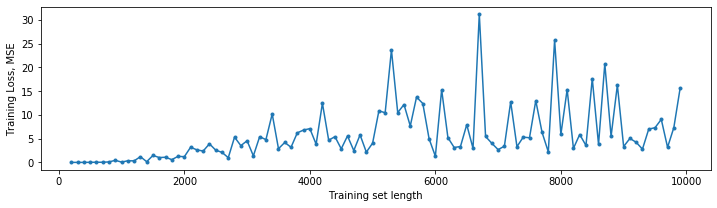

In [22]:
model = esn.Reservoir(100)
print(model)
data = esn.Data.create_source('lorenz')

points_to_skip = 300
training_signal_lengths = np.arange(200, 10000, 100, dtype=int)
test_length = 200

loss = np.zeros(len(training_signal_lengths))

for i in range(len(training_signal_lengths)):
    seed = np.random.uniform()    
    x,y = data.generate(points_to_skip + training_signal_lengths[i],
                        sampling_step=0.02, seed=seed) # Larger set for training
    model.fit(x, y, skip=points_to_skip)

    # Now generate new data, and predict on it
    # x,y = data.generate(2000, sampling_step=0.02, seed=seed)
    z = model.predict(x, length=points_to_skip+test_length)
     
    loss[i] = esn.Data.loss(y[points_to_skip:(points_to_skip+test_length)], z[points_to_skip:])
    print('.', end='')

    
plt.figure(figsize=(12,3));
plt.plot(training_signal_lengths, loss, '.-');
plt.xlabel('Training set length');
plt.ylabel('Training Loss, MSE');